In [4]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов  

In [5]:
import wget
wget.download('ftp://ftp.cs.toronto.edu/pub/neuron/delve/data/tarfiles/adult.tar.gz')

100% [..........................................................................] 1849361 / 1849361

'adult.tar (4).gz'

In [6]:
import tarfile

In [7]:
tarfile.open('adult.tar.gz').extractall()

In [8]:
data = pd.read_csv('adult/Dataset.data.gz', header=None, sep=' ', quotechar='"')


data.columns = ['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'class']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
selectedColumns = data [['class','age', 'education','relationship','race']]

In [13]:
X = pd.get_dummies (selectedColumns, columns = ['education','relationship','race']) 

In [14]:
del X['class']
#from sklearn.preprocessing import LabelEncoder
#X=pd.DataFrame()
#for col in ['age', 'education','relationship','race']:
#    X[col] = LabelEncoder().fit_transform(data[col])
#X.head()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # 

In [16]:
le.fit( data['class'])

LabelEncoder()

In [17]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [18]:
le.transform(le.classes_)

array([0, 1])

<AxesSubplot: >

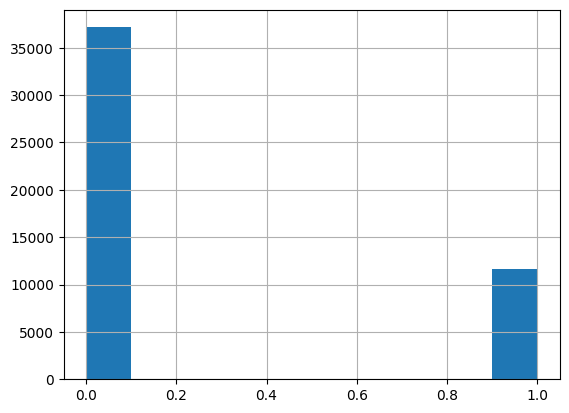

In [19]:
y = pd.Series (data = le.transform(data['class']))
y.hist()

In [20]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = LogisticRegression( max_iter=1000,solver='lbfgs')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
X

,age,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
48838,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48839,58,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
48840,22,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
model.predict_proba(X_test)

array([[0.94748191, 0.05251809],
       [0.99435807, 0.00564193],
       [0.80043811, 0.19956189],
       ...,
       [0.95529957, 0.04470043],
       [0.58963518, 0.41036482],
       [0.95649613, 0.04350387]])

In [26]:

model.score(X_test,y_test)

0.8270661298027707

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_test,model.predict(X_test))

0.5552825552825553

In [29]:
f1_score(y_train,model.predict(X_train))

0.5445573294629898

In [30]:
X

,age,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
48838,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48839,58,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
48840,22,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<AxesSubplot: xlabel='age'>

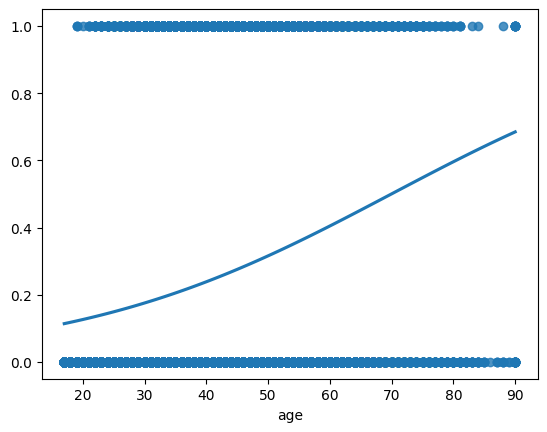

In [31]:
import seaborn as sns
sns.regplot (x=X_train['age'], y=y_train, data=X_train, logistic= True , ci= None ) 

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel='poly')
clf.fit(X_train,y_train)

In [39]:
clf.score(X_train,y_train)

0.7659188627921262

In [37]:
clf.score(X_test,y_test)

0.830956118201051

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()
